In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from src.rule_based import RuleBased

import json
from multiprocessing import Process, Manager
from functools import partial
from itertools import repeat
import time
from sklearn.metrics import confusion_matrix

# IOU method

In [2]:
def IoU(y_ture, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_ture, y_pred, labels=[0, 1]).ravel()
    iou = tp / (tp + fp + fn)
    acc = (tp + tn) / (tp + tn + fp + fn)
    return iou, acc

cmap_matrix = [[1, 1, 1], [1, 1, 0]]
cm = colors.ListedColormap(cmap_matrix)

# Disable warnings
warnings.filterwarnings('ignore')

# Test in 1d data

  ([x0 <= 1.053] ∧ [x0 > -0.028])
∨ ([x0 <= -0.028] ∧ [x0 > -0.817])
∨ ([x0 <= 1.053] ∧ [x0 > 0.337])
(3, 6)
true overlap - Overlap region: [-1.0305395637794486, 1.0376988250130508]


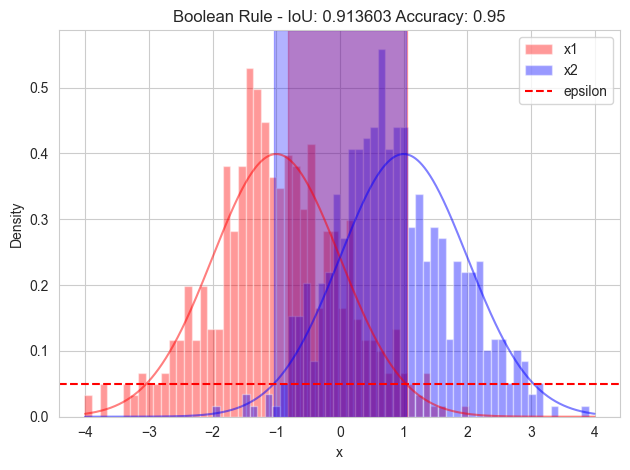

In [3]:
# define some variables
sample_size = 500
eps = 0.05
bin_size = 200
mean1, mean2 = -1, 1
var1, var2 = 1, 1
lower, upper, step = -4, 4, 1 / bin_size
# Generate test datasets
x1 = np.random.normal(mean1, var1, sample_size)
x2 = np.random.normal(mean2, var2, sample_size)
# Get the true overlap region
X = np.concatenate([x1, x2]).reshape(-1, 1)
f1 = stats.multivariate_normal.pdf(x=X, mean=mean1, cov=var1, allow_singular=True)
f2 = stats.multivariate_normal.pdf(x=X, mean=mean2, cov=var2, allow_singular=True)
true_ov = (f1 > eps) & (f2 > eps)
true_ov_data = X[true_ov]
true_interval = (true_ov_data.min(), true_ov_data.max())

x1s = x2s = np.mgrid[lower:upper:step]
f1_distribution = stats.multivariate_normal.pdf(x=x1s, mean=mean1, cov=var1, allow_singular=True)
f2_distribution = stats.multivariate_normal.pdf(x=x2s, mean=mean2, cov=var2, allow_singular=True)

# Use Rule based overlap estimator to estimate the overlap
estimator = RuleBased()
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2))])
estimator.fit(X, y)

print(estimator.ov.rules(as_str=True))
print(estimator.ov.complexity())

estimated_ov = estimator.predict(X)
estimated_ov_data = X[estimated_ov == 1]
estimated_interval = (estimated_ov_data.min(), estimated_ov_data.max())

# Plot the class distribution
plt.plot(x1s, f1_distribution, color='red', alpha=0.5)
plt.plot(x2s, f2_distribution, color='blue', alpha=0.5)

# Plot the datasets
plt.hist(x1, bins=50, alpha=0.4, label='x1', density=True, color="red")
plt.hist(x2, bins=50, alpha=0.4, label='x2', density=True, color="blue")

print('{} - Overlap region: [{}, {}]'.format("true overlap", true_interval[0], true_interval[1]))

if len(estimated_ov_data) > 0:
    plt.axvspan(estimated_interval[0], estimated_interval[1], alpha=0.3, color='red')

# Plot true interval
plt.axvspan(true_interval[0], true_interval[1], alpha=0.3, color='blue')
# Plot a line for the epsilon value
plt.axhline(eps, color='red', linestyle='--', label='epsilon')

# Compute Intersection over Union between estimated interval and true interval
iou, acc = IoU(true_ov, estimated_ov)
plt.title('%s - IoU: %2f Accuracy: %.2f' % ("Boolean Rule", iou, acc))

plt.xlabel("x")
plt.ylabel("Density")
plt.tight_layout()
plt.legend()
plt.show()

# Test 1d special case

  ([x0 <= -0.340] ∧ [x0 > -2.424])
∨ ([x0 <= 1.407] ∧ [x0 > 0.007])
(2, 4)
true overlap - Overlap region: [-2.0328120465248016, 2.0256168412480346]


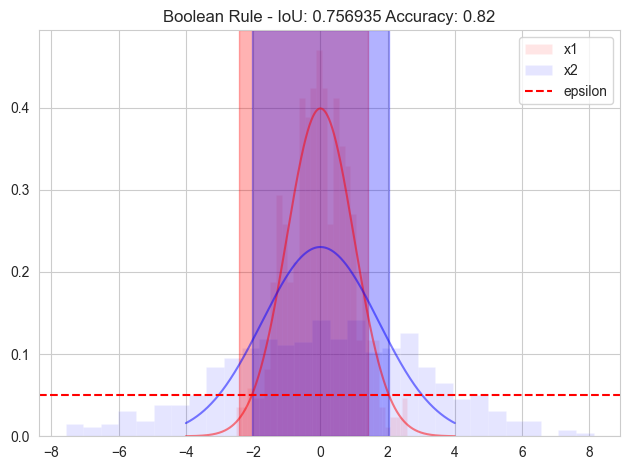

In [4]:
# define some variables
sample_size = 500
eps = 0.05
bin_size = 200
mean1, mean2 = 0, 0
var1, var2 = 1, 3
lower, upper, step = -4, 4, 1 / bin_size

# Generate test datasets
x1 = np.random.normal(mean1, var1, sample_size)
x2 = np.random.normal(mean2, var2, sample_size)
# Get the true overlap region
X = np.concatenate([x1, x2]).reshape(-1, 1)
f1 = stats.multivariate_normal.pdf(x=X, mean=mean1, cov=var1, allow_singular=True)
f2 = stats.multivariate_normal.pdf(x=X, mean=mean2, cov=var2, allow_singular=True)
true_ov = (f1 > eps) & (f2 > eps)
true_ov_data = X[true_ov]
true_interval = (true_ov_data.min(), true_ov_data.max())

x1s = x2s = np.mgrid[lower:upper:step]
f1_distribution = stats.multivariate_normal.pdf(x=x1s, mean=mean1, cov=var1, allow_singular=True)
f2_distribution = stats.multivariate_normal.pdf(x=x2s, mean=mean2, cov=var2, allow_singular=True)

# Use Rule based overlap estimator to estimate the overlap
estimator = RuleBased()
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2))])
estimator.fit(X, y)

print(estimator.ov.rules(as_str=True))
print(estimator.ov.complexity())

estimated_ov = estimator.predict(X)
estimated_ov_data = X[estimated_ov == 1]
estimated_interval = (estimated_ov_data.min(), estimated_ov_data.max())

# Plot the class distribution
plt.plot(x1s, f1_distribution, color='red', alpha=0.5)
plt.plot(x2s, f2_distribution, color='blue', alpha=0.5)

# Plot the datasets
plt.hist(x1, bins=30, alpha=0.1, label='x1', density=True, color="red")
plt.hist(x2, bins=30, alpha=0.1, label='x2', density=True, color="blue")

print('{} - Overlap region: [{}, {}]'.format("true overlap", true_interval[0], true_interval[1]))

if len(estimated_ov_data) > 0:
    plt.axvspan(estimated_interval[0], estimated_interval[1], alpha=0.3, color='red')

# Plot true interval
plt.axvspan(true_interval[0], true_interval[1], alpha=0.3, color='blue')
# Plot a line for the epsilon value
plt.axhline(eps, color='red', linestyle='--', label='epsilon')

# Compute Intersection over Union between estimated interval and true interval
iou, acc = IoU(true_ov, estimated_ov)
plt.title('%s - IoU: %2f Accuracy: %.2f' % ("Boolean Rule", iou, acc))

plt.tight_layout()
plt.legend()
plt.show()

# Test 2d data

  ([x0 <= 0.985] ∧ [x0 > -1.316] ∧ [x1 <= 1.492] ∧ [x1 > -0.891])
∨ ([x0 <= 1.481] ∧ [x0 > -0.565] ∧ [x1 <= -0.891] ∧ [x1 > -1.353])
∨ ([x0 <= 1.481] ∧ [x0 > 0.985] ∧ [x1 <= 1.054] ∧ [x1 > -0.891])
(3, 12)
One Class SVM IoU: 0.44, accuracy: 0.64
Boolean Rule IoU: 0.50, accuracy: 0.70


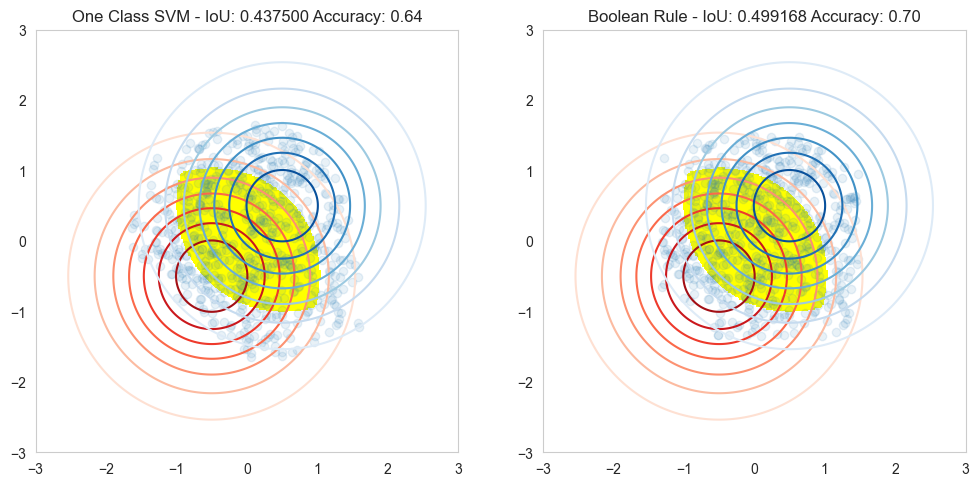

In [5]:
# define some variables
full_size = (10000, 2)
sample_size = (500, 2)
eps = 0.05
bin_size = 50
mean1, mean2 = [-0.5, -0.5], [0.5, 0.5]
var1, var2 = 1, 1
lower, upper, step = -3, 3, 1 / bin_size

# Generate test datasets
x1 = np.random.normal(mean1, var1, sample_size)
x2 = np.random.normal(mean2, var2, sample_size)
# Get the true overlap region
X = np.concatenate([x1, x2]).reshape(-1, 2)
f1 = stats.multivariate_normal.pdf(x=X, mean=mean1, cov=var1, allow_singular=True)
f2 = stats.multivariate_normal.pdf(x=X, mean=mean2, cov=var2, allow_singular=True)
true_ov = (f1 > eps) & (f2 > eps)
true_ov_data = X[true_ov]

# Get overlap region
xs, ys = np.mgrid[lower:upper:step, lower:upper:step]
ts = np.dstack((xs, ys))
f1_distribution = stats.multivariate_normal.pdf(x=ts, mean=mean1, cov=var1, allow_singular=True)
f2_distribution = stats.multivariate_normal.pdf(x=ts, mean=mean2, cov=var2, allow_singular=True)
class_ov = (f1_distribution > eps) & (f2_distribution > eps)

# Use Rule based overlap estimator to estimate the overlap
estimator = RuleBased()
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2))])
estimator.fit(X, y)

print(estimator.ov.rules(as_str=True))
print(estimator.ov.complexity())

svm_ov = estimator.predict(X, True)
svm_ov_data = X[svm_ov == 1]
br_ov = estimator.predict(X)
br_ov_data = X[br_ov == 1]
svm_iou, svm_acc = IoU(true_ov, svm_ov)
br_iou, br_acc = IoU(true_ov, br_ov)
print("One Class SVM IoU: %.2f, accuracy: %.2f" % (svm_iou, svm_acc))
print("Boolean Rule IoU: %.2f, accuracy: %.2f" % (br_iou, br_acc))

plt.figure(figsize=[12, 6.75])
# Overlap data from boolean rules
ax1 = plt.subplot(121)
ax1.scatter(svm_ov_data[:, 0], svm_ov_data[:, 1], alpha=0.1)
plt.title('%s - IoU: %2f Accuracy: %.2f' % ("One Class SVM", svm_iou, svm_acc))
ax1.contour(xs, ys, f1_distribution, cmap='Reds')
ax1.contour(xs, ys, f2_distribution, cmap='Blues')
ax1.imshow(class_ov.T, extent=[lower, upper, lower, upper], origin="lower", cmap=cm)
ax1.grid(False)

estimated_overlap_2 = X[estimator.predict(X, True) == 1]
# Overlap data from One Class SVM
ax2 = plt.subplot(122)
ax2.scatter(br_ov_data[:, 0], br_ov_data[:, 1], alpha=0.1)
plt.title('%s - IoU: %2f Accuracy: %.2f' % ("Boolean Rule", br_iou, br_acc))
ax2.contour(xs, ys, f1_distribution, cmap='Reds')
ax2.contour(xs, ys, f2_distribution, cmap='Blues')
ax2.imshow(class_ov.T, extent=[lower, upper, lower, upper], origin="lower", cmap=cm)
ax2.grid(False)

plt.show()

# Test with outlier data

  ([x0 <= 0.823] ∧ [x0 > -0.960])
(1, 2)
true overlap - Overlap region: [-1.0315008432297421, 1.0313705837219271]


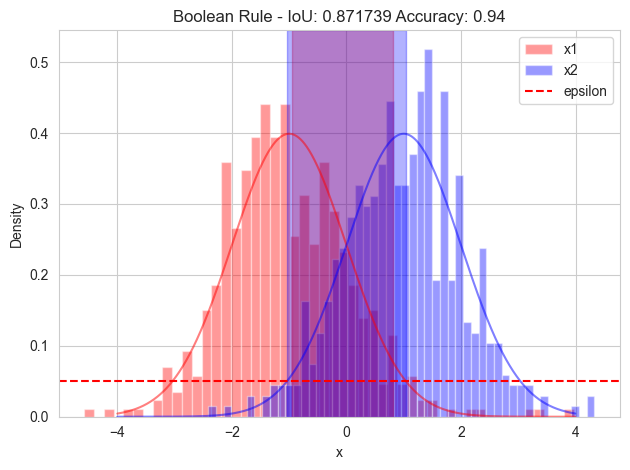

In [6]:
# define some variables
sample_size = 500
eps = 0.05
bin_size = 200
mean1, mean2 = -1, 1
var1, var2 = 1, 1
lower, upper, step = -4, 4, 1 / bin_size
out_mean1, out_mean2 = 3, 0
out_var1, out_var2 = 1, 1
out_size1, out_size2 = 5, 0

# Generate test datasets
x1 = np.random.normal(mean1, var1, sample_size)
x2 = np.random.normal(mean2, var2, sample_size)
outlier1 = np.random.normal(out_mean1, out_var1, out_size1)
# Get the true overlap region
X = np.concatenate([x1, x2]).reshape(-1, 1)
f1 = stats.multivariate_normal.pdf(x=X, mean=mean1, cov=var1, allow_singular=True)
f2 = stats.multivariate_normal.pdf(x=X, mean=mean2, cov=var2, allow_singular=True)
true_ov = (f1 > eps) & (f2 > eps)
true_ov_data = X[true_ov]
true_interval = (true_ov_data.min(), true_ov_data.max())

x1s = x2s = np.mgrid[lower:upper:step]
f1_distribution = stats.multivariate_normal.pdf(x=x1s, mean=mean1, cov=var1, allow_singular=True)
f2_distribution = stats.multivariate_normal.pdf(x=x2s, mean=mean2, cov=var2, allow_singular=True)

# Use Rule based overlap estimator to estimate the overlap
X = np.concatenate([X, outlier1.reshape(-1, 1)])
estimator = RuleBased()
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2)), np.ones(len(outlier1))])
estimator.fit(X, y)

print(estimator.ov.rules(as_str=True))
print(estimator.ov.complexity())

estimated_ov = estimator.predict(X)
estimated_ov_data = X[estimated_ov == 1]
estimated_interval = (estimated_ov_data.min(), estimated_ov_data.max())

# Plot the class distribution
plt.plot(x1s, f1_distribution, color='red', alpha=0.5)
plt.plot(x2s, f2_distribution, color='blue', alpha=0.5)

# Plot the datasets
plt.hist(np.concatenate([x1, outlier1]), bins=50, alpha=0.4, label='x1', density=True, color="red")
plt.hist(x2, bins=50, alpha=0.4, label='x2', density=True, color="blue")

print('{} - Overlap region: [{}, {}]'.format("true overlap", true_interval[0], true_interval[1]))

if len(estimated_ov_data) > 0:
    plt.axvspan(estimated_interval[0], estimated_interval[1], alpha=0.3, color='red')

# Plot true interval
plt.axvspan(true_interval[0], true_interval[1], alpha=0.3, color='blue')
# Plot a line for the epsilon value
plt.axhline(eps, color='red', linestyle='--', label='epsilon')

# Compute Intersection over Union between estimated interval and true interval
iou, acc = IoU(np.concatenate([true_ov, np.zeros(len(outlier1), dtype=bool)]), estimated_ov)
plt.title('%s - IoU: %2f Accuracy: %.2f' % ("Boolean Rule", iou, acc))

plt.xlabel("x")
plt.ylabel("Density")
plt.tight_layout()
plt.legend()
plt.show()

# 2d outlier with normal distribution

  ([x0 <= 1.422] ∧ [x0 > -1.401] ∧ [x1 <= 0.619] ∧ [x1 > -1.497])
∨ ([x0 <= 1.422] ∧ [x0 > 0.604] ∧ [x1 <= 0.954] ∧ [x1 > 0.619])
∨ ([x0 <= 0.604] ∧ [x0 > -1.401] ∧ [x1 <= 1.487] ∧ [x1 > 0.619])
(3, 12)
One Class SVM IoU: 0.49, accuracy: 0.68
Boolean Rule IoU: 0.53, accuracy: 0.71


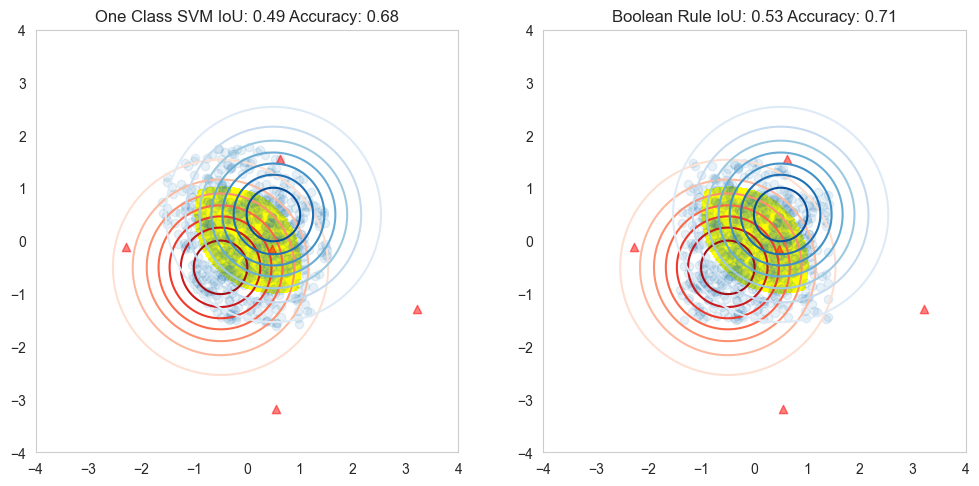

In [7]:
# define some variables
sample_size = (500, 2)
eps = 0.05
bin_size = 50
mean1, mean2 = [-0.5, -0.5], [0.5, 0.5]
var1, var2 = 1, 1
lower, upper, step = -4, 4, 1 / bin_size
out_size1, out_size2 = (5, 2), 0

# Generate test datasets
x1 = np.random.normal(mean1, var1, sample_size)
x2 = np.random.normal(mean2, var2, sample_size)
outlier1 = np.random.uniform(-4, 4, out_size1)
# Get the true overlap region
X = np.concatenate([x1, x2]).reshape(-1, 2)
f1 = stats.multivariate_normal.pdf(x=X, mean=mean1, cov=var1, allow_singular=True)
f2 = stats.multivariate_normal.pdf(x=X, mean=mean2, cov=var2, allow_singular=True)
true_ov = (f1 > eps) & (f2 > eps)
true_ov_data = X[true_ov]

# Get overlap region
xs, ys = np.mgrid[lower:upper:step, lower:upper:step]
ts = np.dstack((xs, ys))
f1_distribution = stats.multivariate_normal.pdf(x=ts, mean=mean1, cov=var1, allow_singular=True)
f2_distribution = stats.multivariate_normal.pdf(x=ts, mean=mean2, cov=var2, allow_singular=True)
class_ov = (f1_distribution > eps) & (f2_distribution > eps)

# Use Rule based overlap estimator to estimate the overlap
estimator = RuleBased()
X = np.concatenate([X, outlier1.reshape(-1, 2)])
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2)), np.ones(len(outlier1))])
estimator.fit(X, y)

print(estimator.ov.rules(as_str=True))
print(estimator.ov.complexity())

svm_ov = estimator.predict(X, True)
svm_ov_data = X[svm_ov == 1]
br_ov = estimator.predict(X)
br_ov_data = X[br_ov == 1]
true_ov = np.concatenate([true_ov, np.zeros(len(outlier1), dtype=bool)])
svm_iou, svm_acc = IoU(true_ov, svm_ov)
br_iou, br_acc = IoU(true_ov, br_ov)
print("One Class SVM IoU: %.2f, accuracy: %.2f" % (svm_iou, svm_acc))
print("Boolean Rule IoU: %.2f, accuracy: %.2f" % (br_iou, br_acc))

plt.figure(figsize=[12, 6.75])
# Overlap data from boolean rules
ax1 = plt.subplot(121)
ax1.scatter(svm_ov_data[:, 0], svm_ov_data[:, 1], alpha=0.1)
ax1.scatter(outlier1[:, 0], outlier1[:, 1], alpha=0.5, marker="^", color="red")
ax1.set_title('One Class SVM IoU: %.2f Accuracy: %.2f' % (svm_iou, svm_acc))
ax1.contour(xs, ys, f1_distribution, cmap='Reds', label="x1")
ax1.contour(xs, ys, f2_distribution, cmap='Blues', label="x2")
ax1.imshow(class_ov.T, extent=[lower, upper, lower, upper], origin="lower", cmap=cm)
ax1.grid(False)

estimated_overlap_2 = X[estimator.predict(X, True) == 1]
# Overlap data from One Class SVM
ax2 = plt.subplot(122)
ax2.scatter(br_ov_data[:, 0], br_ov_data[:, 1], alpha=0.1)
ax2.scatter(outlier1[:, 0], outlier1[:, 1], alpha=0.5, marker="^", color="red")
ax2.set_title('Boolean Rule IoU: %.2f Accuracy: %.2f' % (br_iou, br_acc))
ax2.contour(xs, ys, f1_distribution, cmap='Reds')
ax2.contour(xs, ys, f2_distribution, cmap='Blues')
ax2.imshow(class_ov.T, extent=[lower, upper, lower, upper], origin="lower", cmap=cm)
ax2.grid(False)
plt.show()